In [4]:
## Final Project 911 call. 
import warnings

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [12]:

df = pd.read_csv('911.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583419 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10/12/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10/12/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10/12/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10/12/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19402.0,EMS: DIZZINESS,10/12/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [61]:
# Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 presents?
df['zip'].value_counts().head(10)

19401.0    45615
19464.0    43923
19403.0    34893
19446.0    32276
19406.0    22467
19002.0    21075
19468.0    18943
19046.0    17886
19454.0    17661
19090.0    17377
Name: zip, dtype: int64

In [62]:
##  Compute -- What are the top 4 townships (twp) for 911 calls & 
##Question 2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

df['twp'].value_counts().head(4)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
Name: twp, dtype: int64

In [15]:
## how many unique title codes are there?
df['title'].nunique()

148

In [16]:
extract = lambda x: x.split(':')[0]

df = df.assign(Reason = df['title'].apply(extract))

In [17]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

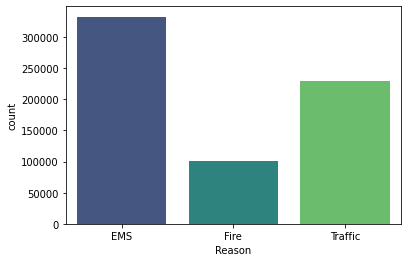

In [18]:
 ##Compute -- Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? 
    ##Which comes second
sns.countplot(x = 'Reason', data = df, palette='viridis')

In [19]:

type(df['timeStamp'].iloc[0])


str

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583419 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [21]:
#Convert to Datetime 
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
#Confirm change 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583419 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   Reason     663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 50.6+ MB


In [33]:
time = df['timeStamp'].iloc[0]

In [34]:
#Create hour column
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)


In [35]:
#Create day month colum
df['month'] = df['timeStamp'].apply(lambda time: time.month)


In [36]:
#Creat Day of Week column
df['DayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)


In [37]:
#dmap for days of the week 
dmap = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

In [38]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,10,0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19402.0,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:00,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,2
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:00,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,2
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:00,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,2
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:00,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,2


In [39]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,Monday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,Monday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,Monday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,10,Monday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19402.0,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,10,Monday


In [52]:
df['month'].nunique()

12

In [ ]:
byMonth = df.groupby('month').count()
byMonth.head(15)

<AxesSubplot:xlabel='month'>

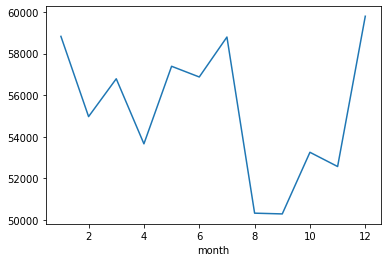

In [51]:
#Use lat to show data for missing months
byMonth['lat'].plot()

In [53]:
t = df['timeStamp'].iloc[0]
df['date'] = (df['timeStamp']).apply(lambda t:t.date())
t.date()
df.head(20)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,DayOfWeek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,Monday,2015-10-12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,Monday,2015-10-12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,Monday,2015-10-12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,10,Monday,2015-10-12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19402.0,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,10,Monday,2015-10-12
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-10-12 15:39:00,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,15,10,Monday,2015-10-12
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-10-12 16:46:00,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,16,10,Monday,2015-10-12
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-10-12 16:17:00,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,16,10,Monday,2015-10-12
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-10-12 16:51:00,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,16,10,Monday,2015-10-12
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-10-12 17:35:00,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,10,Monday,2015-10-12


In [54]:
#Date and count 
df.groupby('date').count()['lat']

date
2015-10-12    114
2015-11-12    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
             ... 
2020-12-03    401
2020-12-04    243
2020-12-05    234
2020-12-06    392
2020-12-07    325
Name: lat, Length: 1694, dtype: int64

In [9]:
#Question 5: Which day got maximum calls for EMS and how


plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df_wrang,hue='Reason')

NameError: name 'wrang' is not defined

<Figure size 720x432 with 0 Axes>

In [7]:
#Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest?


plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',data=df_wrang,hue='Reason')

NameError: name 'df_wrang' is not defined

<Figure size 864x432 with 0 Axes>